In [9]:
# Step 0. Load libraries and modules

# Dataframes and matrices ----------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Statistics -----------------------------------------------------------
import statsmodels.formula.api as smf
from statsmodels.api import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
# Preprocessing --------------------------------------------------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Metrics --------------------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [17]:
# Step 1. Load the dataset
# Source: https://www.kaggle.com/code/sagarvarandekar/medical-insurance-regression-analysis-and-predict/notebook
df_raw=pd.read_csv('insurance.csv')

In [18]:
# 1.1 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In this case the variable sex, smoker and region is categorical variable for thar reason we have to transform in categorial variable in sted of object.

In [19]:
# 1.2 Take a sample
df_raw.sample(10)

,age,sex,bmi,children,smoker,region,charges
406,33,female,24.310,0,no,southeast,4185.09790
994,27,female,20.045,3,yes,northwest,16420.49455
220,34,female,33.700,1,no,southwest,5012.47100
914,33,male,24.605,2,no,northwest,5257.50795
1249,32,male,33.630,1,yes,northeast,37607.52770
591,47,male,19.570,1,no,northwest,8428.06930
597,34,female,33.250,1,no,northeast,5594.84550
742,53,male,34.105,0,yes,northeast,43254.41795
798,58,female,33.100,0,no,southwest,11848.14100
1270,26,male,33.915,1,no,northwest,3292.52985


In [20]:
# 1.3 Transform if needed  tranform object to categorical.
df_transformed = df_raw.copy()
df_transformed['sex'] = pd.Categorical(df_transformed['sex'])
df_transformed['smoker'] = pd.Categorical(df_transformed['smoker'])
df_transformed['region'] = pd.Categorical(df_transformed['region'])
df_transformed['charges'] = round(df_transformed['charges'], 1) # 1 es decimal


In [21]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [22]:
#Se copia el data set con el fin de almacenarlo https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html
#When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. 
#Modifications to the data or indices of the copy will not be reflected in the original object (see notes below
df = df_transformed.copy()

In [ ]:
# Step 2. Make a basic EDA

In [29]:
# 2.1 Split the dataset so to avoid bias - evitar incluir perecepciones.
X = df.drop(['charges'], axis = 1)
y = df.charges
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=28) 

In [30]:
# 2.2 Join the train sets to ease insights
df_train = pd.concat([X_train, y_train], axis=1)

In [31]:
# 2.3 Get basic info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 827 to 1281
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1003 non-null   int64   
 1   sex       1003 non-null   category
 2   bmi       1003 non-null   float64 
 3   children  1003 non-null   int64   
 4   smoker    1003 non-null   category
 5   region    1003 non-null   category
 6   charges   1003 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 42.6 KB


In [26]:
# 2.4 Take a sample
df_train.sample(10)

,age,sex,bmi,children,smoker,region,charges
1223,20,female,24.420,0,yes,southeast,26125.7
483,51,female,39.500,1,no,southwest,9880.1
507,21,male,23.750,2,no,northwest,3077.1
995,39,female,23.275,3,no,northeast,7986.5
1003,48,male,29.600,0,no,southwest,21232.2
710,18,male,35.200,1,no,southeast,1727.5
1230,52,male,34.485,3,yes,northwest,60021.4
1017,26,female,34.200,2,no,southwest,3987.9
161,18,female,36.850,0,yes,southeast,36149.5
564,18,female,32.120,2,no,southeast,2801.3


In [27]:
# 2.5 Describe the numerical and date variables
df_train.describe()

,age,bmi,children,charges
count,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.142572,30.639581,1.115653,13286.510768
std,13.982046,6.177580,1.218038,12257.531215
min,18.000000,15.960000,0.000000,1121.900000
25%,26.000000,25.935000,0.000000,4703.000000
50%,39.000000,30.360000,1.000000,9301.900000
75%,51.000000,34.770000,2.000000,16453.300000
max,64.000000,49.060000,5.000000,63770.400000


In [28]:
# 2.6 Describe categorical variables
df_train.describe(include='category')

,sex,smoker,region
count,1003,1003,1003
unique,2,2,4
top,male,no,southeast
freq,516,800,278


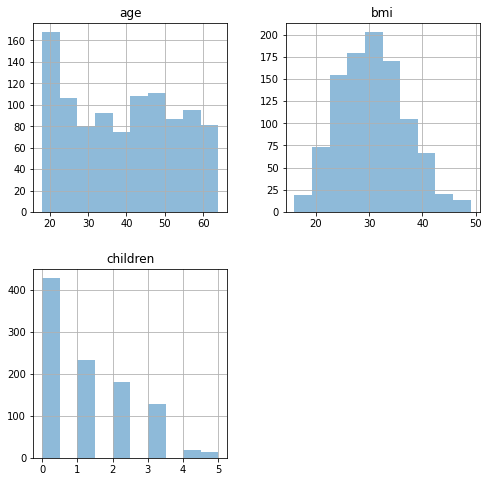

In [25]:
# 2.7 Perform univariate analysis - histograms
X_train.hist(figsize=(8,8), alpha=0.5)
plt.show()

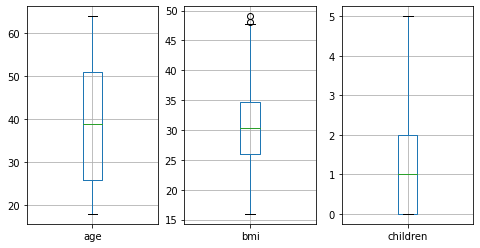

In [26]:
# 2.8 Perform univariate analysis - boxplots
fig, ax = plt.subplots(1,3, figsize=(8,4))
axs= ax.flatten()
for i in range(len(axs)):
  X_train._get_numeric_data().iloc[:,i].to_frame().boxplot(ax=axs[i])

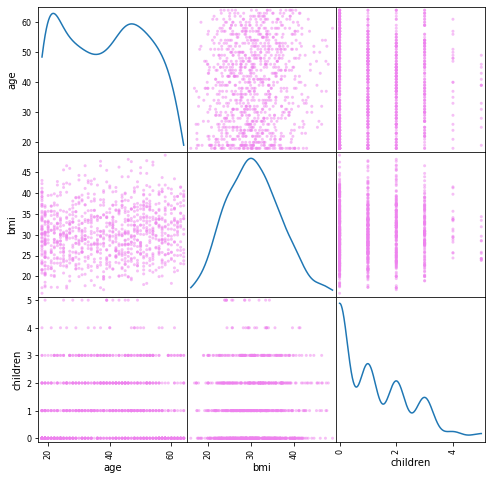

In [27]:
# 2.9 Perform bivariate analysis - numericals
#La función pandas.plotting.scatter_mattrix muestra una matriz de gráficos de dispersión cruzando las características cuantitativas del dataframe indicado:
pd.plotting.scatter_matrix(X_train, diagonal='kde', figsize=(8,8), c='Violet')
plt.show()

No se visualiza ningun comportamiento en los datos que determine alguna inicidencia.

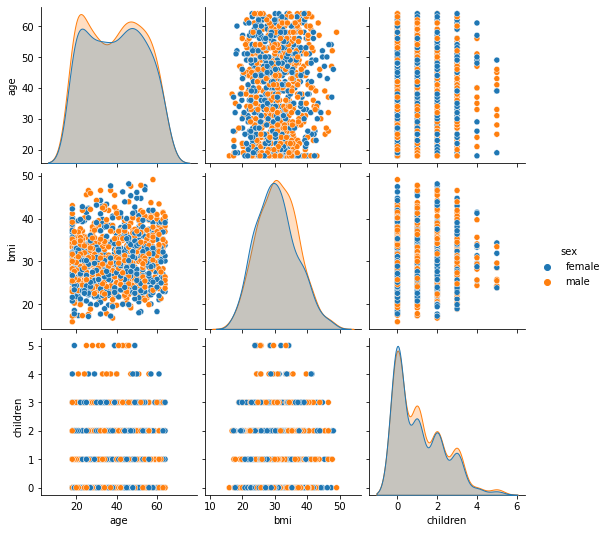

In [28]:
# 2.10 Perform bivariate analysis per category
#Para trazar múltiples distribuciones bivariadas por pares en un conjunto de datos, puede usar la función pairplot(). Esto muestra la relación para(n, 2) 
# combinación de variables en un DataFrame como una matriz de gráficos y los gráficos diagonales son los gráficos univariados.
sns.pairplot(data=X_train, hue='sex')
plt.show()

En este caso la variabl sex con las otras caracteristicas del dataset no se visualizan datos relevantes en el analisis de la grafica.

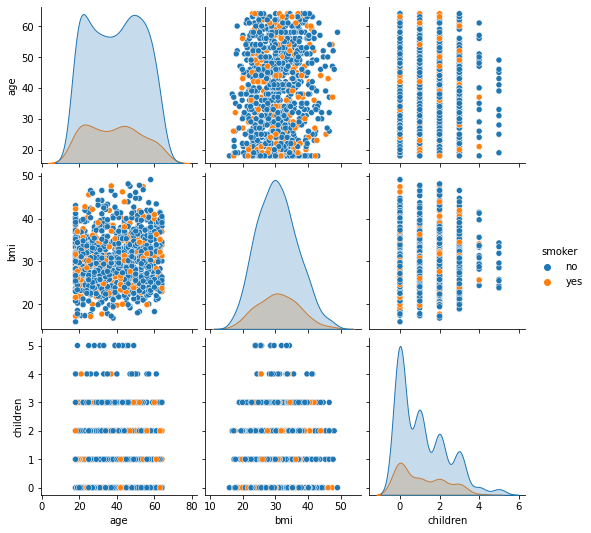

In [29]:
sns.pairplot(data=X_train, hue='smoker')
plt.show()

La variable smoke cambia en funcion del analisis de las otras variables.

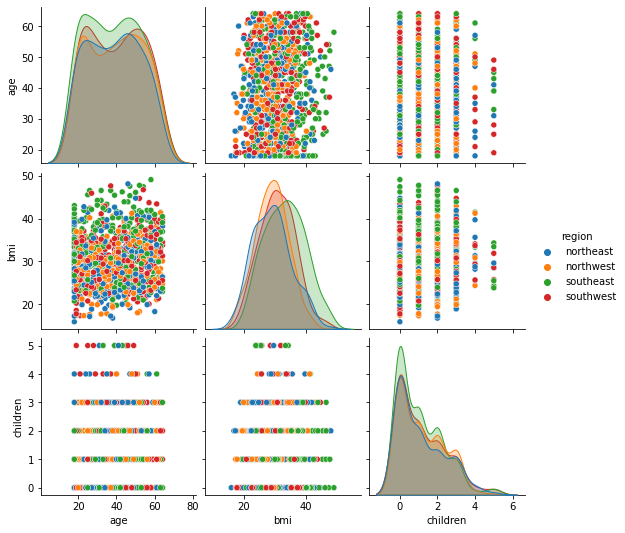

In [30]:
sns.pairplot(data=X_train, hue='region')
plt.show()

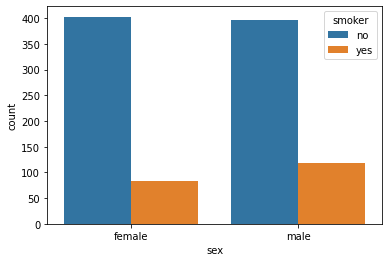

In [31]:
# 2.11 Perform bivariate categorical analysis 
sns.countplot(data=X_train, x='sex', hue='smoker')
plt.show()

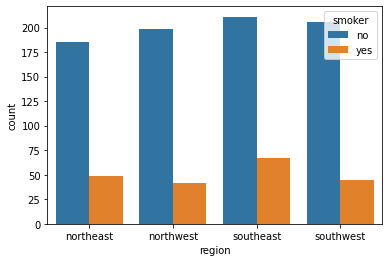

In [32]:
sns.countplot(data=X_train, x='region', hue='smoker')
plt.show()

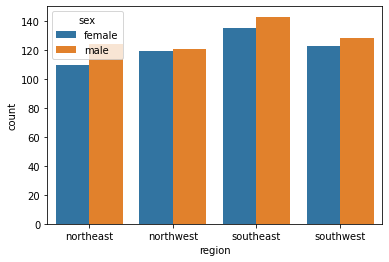

In [33]:
sns.countplot(data=X_train, x='region', hue='sex')
plt.show()

In [34]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial
X_train.corr().style.background_gradient(cmap='Blues')

,age,bmi,children
age,1.000000,0.105438,0.049017
bmi,0.105438,1.000000,0.008793
children,0.049017,0.008793,1.000000


In [37]:
# 2.11 Perform multivariate analysis - VIF
# https://thecodingbot.com/vif-implementation-in-python/
# https://github.com/statsmodels/statsmodels/issues/2376
# https://www.statology.org/how-to-calculate-vif-in-python/
# See what happens when no constant is added!
vif = pd.DataFrame()
X_numeric = X_train._get_numeric_data()
X_numeric = add_constant(X_numeric)
vif['features'] = X_numeric.columns
vif['Vif'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])] # toma 1 var dep y el resto la predice. Calcula multicolinealidad. Si vif >10 => quitar si vif < 5 pasa.
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,features,Vif
0,const,31.452370
1,age,1.013613
2,bmi,1.011256
3,children,1.002422


In [38]:
# 2.12 Analyze effect on response variable (DV)
df_train.corr().style.background_gradient(cmap='Blues')

,age,bmi,children,charges
age,1.000000,0.105438,0.049017,0.289447
bmi,0.105438,1.000000,0.008793,0.189909
children,0.049017,0.008793,1.000000,0.064911
charges,0.289447,0.189909,0.064911,1.000000


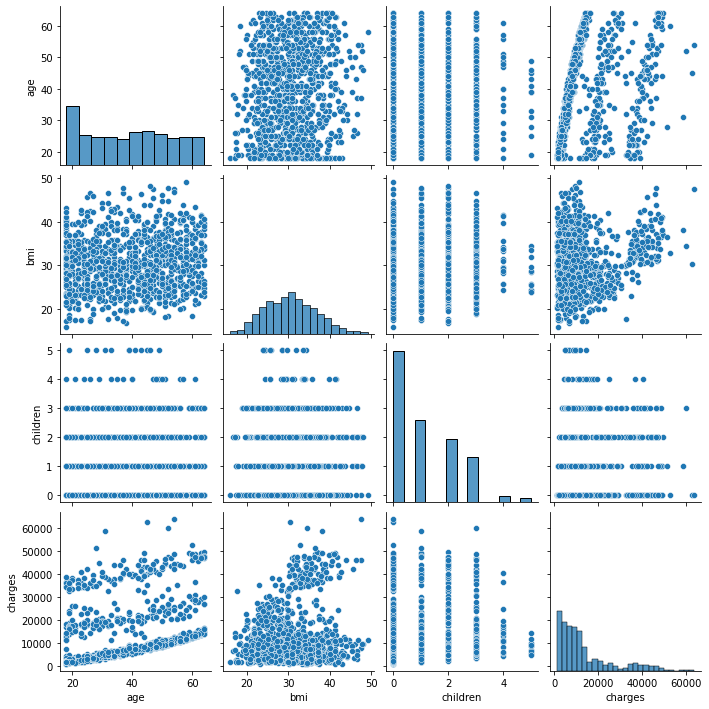

In [39]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(data=df_train)
plt.show()

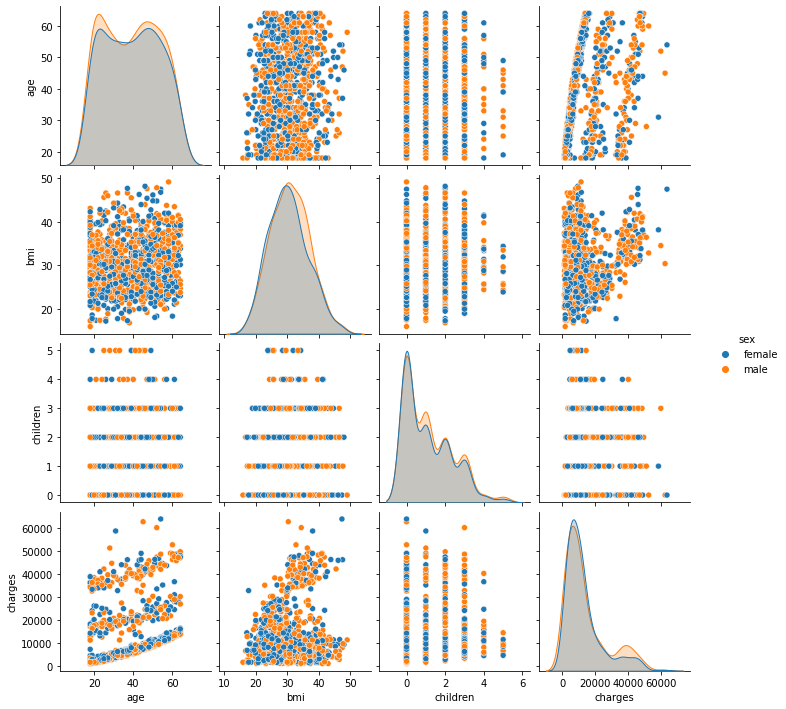

In [40]:
sns.pairplot(data=df_train, hue='sex')
plt.show()

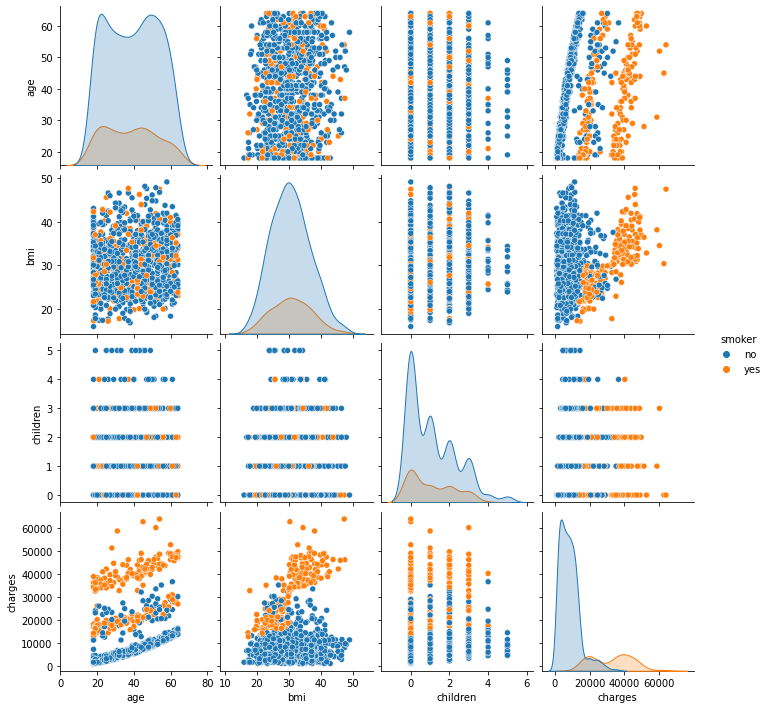

In [41]:
sns.pairplot(data=df_train, hue='smoker')
plt.show()

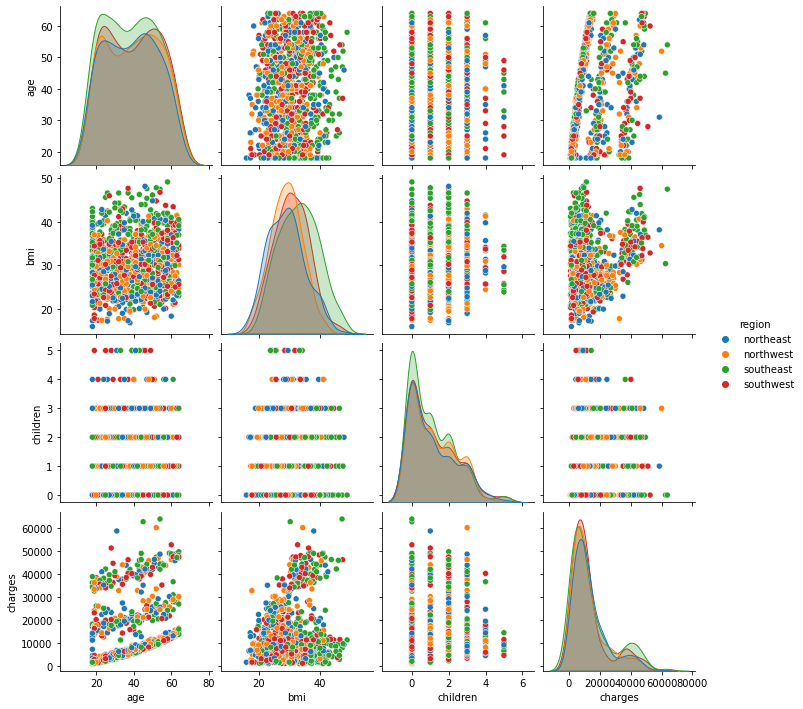

In [42]:
sns.pairplot(data=df_train, hue='region')
plt.show()

In [ ]:
# Step 3. Create and evaluate model - Define your approach and goals
# A. Try out Linear Regression, use Statsmodels to verify assumptions
# B. Tru out Tree Resgression
# C. Try out Random Forest regression
# D. Compare results based on metrics reduction
# Current evidence: Some linear relation between response, age and bmi
# stratified by smoker condition

In [44]:
# 3.1 Create your pipeline processing. Secuencia de pasos
# https://stackoverflow.com/questions/61641852/
# https://jaketae.github.io/study/sklearn-pipeline/
cat_cols = X_train.select_dtypes(include='category').columns
num_cols = X_train.select_dtypes(include='number').columns
cat_transformer_d = Pipeline(steps=[('onehot', OneHotEncoder(drop='first', sparse=False))]) # para datos categoricos. OneHotEncoder, transf variables categoricas en numéricas. Para usar en Linear Regression
cat_transformer_nd = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))]) # para usar en Random Forest y Desicion Tree
num_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
preprocessor_d = ColumnTransformer(transformers=[('num', num_transformer, num_cols), ('cat', cat_transformer_d, cat_cols)])
preprocessor_nd = ColumnTransformer(transformers=[('num', num_transformer, num_cols), ('cat', cat_transformer_nd, cat_cols)])
encode_data_d = Pipeline(steps=[('preprocessor', preprocessor_d)]) # categorias en n-1 columnas
encode_data_nd = Pipeline(steps=[('preprocessor', preprocessor_nd)])


In [45]:
# 3.2 Perform model fit - A
lreg = Pipeline(steps=[('preprocessor', preprocessor_d), ('regressor', LinearRegression())])
lreg.fit(X_train, y_train)
print(f'R^2 score:{lreg.score(X_train, y_train)}')

R^2 score:0.7606462853034327


In [47]:
# 3.2.1 Calculate metrics on model A
y_pred = lreg.predict(X_test)
print(f'R^2 score:{r2_score(y_test, y_pred)}')
print(f'MSE score:{mean_squared_error(y_test, y_pred)}')
print(f'RMSE score:{np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 score:0.7123585633874021
MSE score:39089718.481510684
RMSE score:6252.177099339932


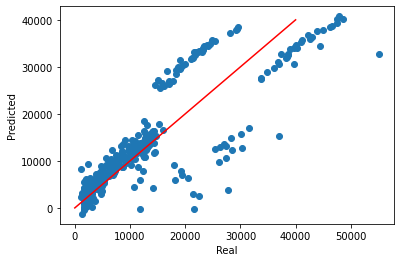

In [48]:
plt.scatter(x=y_test, y=y_pred)
plt.plot([0,40000], [0,40000], color='Red')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [50]:
# 3.2.2 Perform validation model fit - A (LR in Statsmodels)
#trans_f = Pipeline(steps=[('preprocessor', preprocessor_d)])
cat_vars_enc = encode_data_d.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names()
cat_vars_enc 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_male', 'x1_yes', 'x2_northwest', 'x2_southeast',
       'x2_southwest'], dtype=object)

In [51]:
matrix_train = encode_data_d.fit_transform(X_train)
matrix_train # Al pasar a una matriz np se pierde el indice

array([[0.39130435, 0.36450151, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.11767372, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.7173913 , 0.47356495, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.65217391, 0.39093656, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.15217391, 0.14622356, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.63043478, 0.35302115, 0.4       , ..., 1.        , 0.        ,
        0.        ]])

In [53]:
selected_columns = ['age', 'bmi', 'children', 'male', 'smoker', 'northwest', 'southeast','southwest']
df_lr = pd.DataFrame(matrix_train, columns= selected_columns)
df_st = pd.concat([df_lr, y_train.reset_index(drop=True)], axis=1)
df_st

,age,bmi,children,male,smoker,northwest,southeast,southwest,charges
0,0.391304,0.364502,0.2,1.0,1.0,0.0,0.0,0.0,20773.6
1,0.391304,0.117674,0.0,0.0,0.0,0.0,0.0,0.0,5458.0
2,0.717391,0.473565,0.0,1.0,0.0,1.0,0.0,0.0,9174.1
3,0.000000,0.541390,0.0,0.0,0.0,0.0,1.0,0.0,11482.6
4,0.934783,0.459215,0.0,0.0,0.0,1.0,0.0,0.0,13429.0
...,...,...,...,...,...,...,...,...,...
998,0.826087,0.339577,0.0,0.0,0.0,0.0,0.0,1.0,11073.2
999,0.000000,0.425076,0.2,1.0,0.0,0.0,1.0,0.0,1720.4
1000,0.652174,0.390937,0.0,0.0,0.0,0.0,0.0,1.0,8277.5
1001,0.152174,0.146224,0.2,0.0,0.0,0.0,0.0,1.0,3208.8


In [54]:
formula = 'charges ~ age + bmi + children + male + smoker + northwest + southeast + southwest' # charges es un CL de age..... southwest
result = smf.ols(formula= formula, data= df_st).fit()
print(result.summary())  


# Explicacion del reporte https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     394.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.21e-302
Time:                        23:12:47   Log-Likelihood:                -10148.
No. Observations:                1003   AIC:                         2.031e+04
Df Residuals:                     994   BIC:                         2.036e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1444.1887    673.225     -2.145      0.0

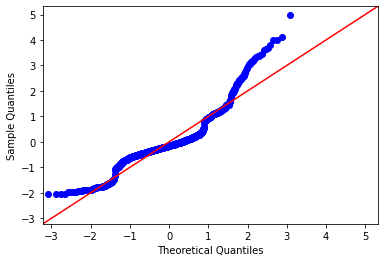

In [57]:
res = result.resid
fig = qqplot(res, line= '45', fit= True)
plt.show()

In [58]:
# 3.3 Perform model fit - B
tree_reg = Pipeline(steps=[('preprocessor', preprocessor_nd), ('regressor', DecisionTreeRegressor())])
tree_reg.fit(X_train, y_train)
print(f"R2 Score:{tree_reg.score(X_train, y_train)}")

R2 Score:1.0


In [59]:
# 3.3.1 Calculate metrics - B
y_pred = tree_reg.predict(X_test)
print(f'R^2 score:{r2_score(y_test, y_pred)}')
print(f'MSE score:{mean_squared_error(y_test, y_pred)}')
print(f'RMSE score:{np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 score:0.6534131145957314
MSE score:47100250.71277612
RMSE score:6862.96224037231


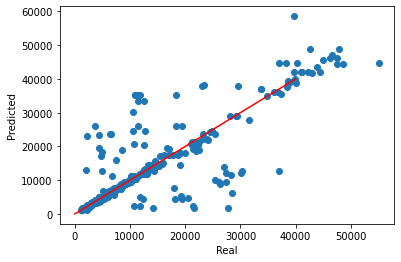

In [60]:
plt.scatter(x=y_test, y=y_pred)
plt.plot([0,40000], [0,40000], color='Red')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [61]:
# 3.4 Perform model fit - C
rf_reg = Pipeline(steps=[('preprocessor', preprocessor_nd), ('regressor', RandomForestRegressor())])
rf_reg.fit(X_train, y_train)
print(f"R2 Score:{rf_reg.score(X_train, y_train)}")

R2 Score:0.9784984900266284


In [63]:
# 3.4.1 Calculate metrics on model B
y_pred = rf_reg.predict(X_test)
print(f'R^2 score:{r2_score(y_test, y_pred)}')
print(f'MSE score:{mean_squared_error(y_test, y_pred)}')
print(f'RMSE score:{np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 score:0.8119498736877476
MSE score:25555520.04094157
RMSE score:5055.2467833866995


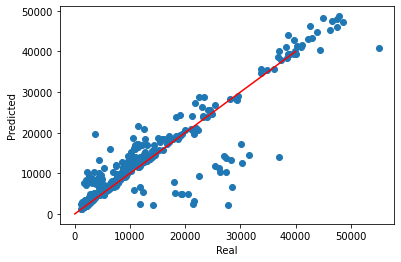

In [64]:
plt.scatter(x=y_test, y=y_pred)
plt.plot([0,40000], [0,40000], color='Red')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

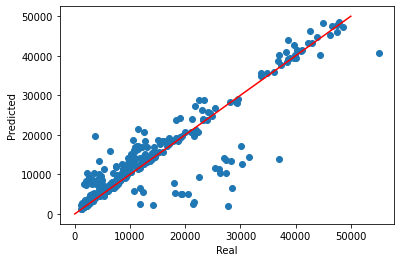

In [65]:
plt.scatter(x=y_test, y=y_pred)
plt.plot([0,50000], [0,50000], color='Red')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Step 4. Write up your conclusions